# Descriptive statistics: common pdf and CDF

- [Some very common Univariate distributions](#Some-very-common-distributions:)  
    * [Bernouilli distribution](#Bernoulli)
    * [Uniform distribution](#Uniform-distribution)
    * [Binomial distribution](#Binomial)
    * [Hypergeometric distribution](#Hypergeometric)
    * [Poisson distribution](#Poisson-distribution)
    * [Geometric distribution](#Geometric-distribution)
    * [Gaussian distribution](#Gaussian-or-normal-distribution)
    * [Chi2 distribution](#chi2)
    * [Student's distribution](#Student's-distribution)
    
- [References and supplementary material](#X.-References-and-supplementary-material:)

In [1]:
#Modules to be used in this notebook
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline    # No need to use %matplotlib inline if I use plt.show after running my code !
#from IPython.html.widgets import interact
from ipywidgets import interact

In [2]:
# Some function for nice interactive pdf-CDF plot
import scipy.stats
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
##from IPython.html.widgets import interact
from ipywidgets import interact
def plot_dist(x,n, continuous=True, distname=''):
    '''
    x : np.array
        random variable
    n : scipy.stats.ditrib
        Distribution object
    '''
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4.))
    if continuous:
        density = n.pdf
        title = "Probability Density Function (pdf)"
        plot_symbol = '-'
    else:
        density = n.pmf
        title = "Probability Mass Function"
        plot_symbol = 'bo'
        
    distribution = density(x)
    ax1.plot(x, distribution, plot_symbol, color="blue", label=distname)
    if continuous:
        ax1.fill_between(x, 0, distribution, color="blue", alpha=0.6)
    else:
        ax1.vlines(x, 0, distribution, colors='b', lw=5, alpha=0.5)
    ax1.set_title(title)
    
    if distname=='gauss':
    # Plot mean and sigma for gaussian
        x1, x2, x3 = n.mean(), n.mean()-n.std(), n.mean()+n.std()
        ax1.vlines(x1, 0, n.pdf(x1), color='black')
        ax1.vlines(x2, 0, n.pdf(x2), color='red')
        ax1.vlines(x3, 0, n.pdf(x3), color='red')
        
        ax2.hlines(0.5, min(x), n.mean())
        ax2.vlines(n.mean(), 0, 0.5)
        ax2.hlines(0.5-0.3413, min(x), n.mean()-n.std(), color='red')
        ax2.vlines(n.mean()-n.std(), 0, 0.5-0.3413, color='red')
        ax2.hlines(0.5+0.3413, min(x), n.mean()+n.std(), color='red')
        ax2.vlines(n.mean()+n.std(), 0, 0.5+0.3413, color='red')

    cdf = n.cdf(x)
    if continuous:
        ax2.plot(x, cdf, lw=1, color="blue", label=distname)
        ax2.fill_between(x, 0, cdf, color="blue", alpha=0.6)
    else:
        ax2.vlines(x, 0, cdf, colors='b', lw=5, alpha=0.5)
    ax2.set_title("CDF")
    

    return ax1, ax2

# Note, this function is adapted from Daniela Huppenkothen and Fernando Perez 
# https://github.com/dhuppenkothen/ClassicalStatsPython

# Some very common distributions:

Relationship between common pdfs

![CommonPDF](../Figures/Common_PDF.png)


### TOC: 

There are a lot of distributions and you may sometimes wonder how to choose one to describe your data ... If you keep in mind some examples of phenomena associated with common distributions, you'll more easily identify which distribution is relevant fo your science case. 

* [Bernouilli distribution](#Bernoulli): This is the distribution you get when you Toss a Coin.  
* [Uniform distribution](#Uniform-distribution): This is the natural expansion of Bernoulli. Instead of 2 values (0,1), you have an ensemble of values: e.g. you throw a dice (instead of a coin). You can generalise to continuous uniform distributions.  
* [Binomial distribution](#Binomial): This is the distribution that results from a binomial, number of heads in a toss coin (e.g. P(3 heads) among x trials). 
* [Hypergeometric distribution](#Hypergeometric): Cousin of Bernoulli. Finite sample, NO replacement
* [Poisson distribution](#Poisson-distribution): related to binomial but low number of success / rare events ! This is the distribution you have when you collect photons with your telescope: many are sent but only a few are collected. 
* [Geometric distribution](#Geometric-distribution): Related to Berouilli. How many times do I need to flip a coin to get a success; E.g. Knowing a transit optical depth (i.e. proba. To get a transit when observing a star), what is the probability to get a transit after observing 2 stars. Knowing 1 lens/800 what is P(lens) after 100 QSO ? 
* [Gaussian distribution](#Gaussian-or-normal-distribution): This is the one you generally use because of the central limit theorem ... but be careful with abusive interpretation of this theorem. Your distribution is often not gaussian. 
* [Chi2 distribution](#chi2): this is the distribution followed by the sum of the square of $k$ independent, normally distributed, random variable.
* [Student's distribution](#Student's-distribution): distribution that arises when you calculate the mean of a distribution, and an estimator of the std on the mean, when your sample is small. This is important when you want to quote errors with some confidence. 

## Bernoulli 

This is a distribution defined by a single parameter $p$. There is only *two* outcomes to the experiment: success or failure. 

$$
Ber(k \,|\, p)\,=\,p^k\,(1-p)^{k}  ~~~~ \rm{for}~k~\rm{in}~\{0,1\} 
$$

Parameter: $p$ : Probability of trial being successful

Expectation: $p$

Standard Deviation: $\sqrt{p\,(1-p)}$

**Example:** The best example of Bernouilli is the situation of a coin-toss (fair or unfair). 

This is a *discrete* distribution for a *variable* $k$ (that takes 2 values: 1 (success) or 0 (failure)).


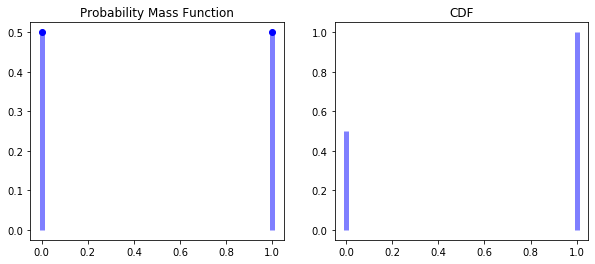

In [5]:
def bernouilli(p):
    n = scipy.stats.bernoulli(p)   
    x = np.linspace(0,1, 2)
    plot_dist(x, n, continuous=False)
    plt.show()
    return

interact(bernouilli, p=(0,1.));    # comment if ipywidget is not installed / does not work
#bernouilli(0.4)   # Run this command if ipywidget does not work - modify params

### Uniform distribution


$$
p(x \, | \, \mu, W) = \frac{1}{W} ~ \mathrm{for}~|x-\mu| \leq \frac{W}{2}, ~\mathrm{and~0~otherwise}
$$

**Parameters:** $\mu$, W 

Expectation: $\mu$

Standard Deviation: W / $\sqrt{12}$

**Example:** Throw a (fair) dice (discrete uniform distribution).  

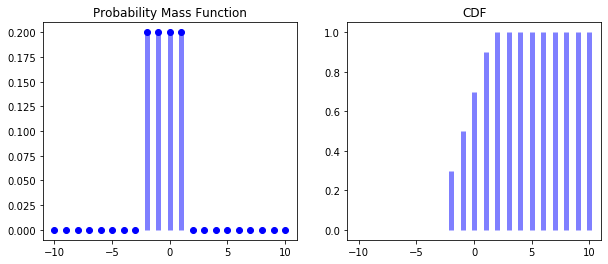

In [6]:
# Discrete version of the uniform distribution (that takes only integer random var)
def uniform_dist(mu,W):
    x = np.linspace(-10, 10, 21)
    m2 = mu-W/2.
    n = scipy.stats.randint(m2, m2+W)   # takes low and high as arguments
    plot_dist(x,n, continuous=False)
    plt.show()
    return

interact(uniform_dist, mu=(-10,10), W=(1, 10));# comment if ipywidget is not installed / does not work
# uniform_dist(2,4)   # Run this command if ipywidget does not work - modify params

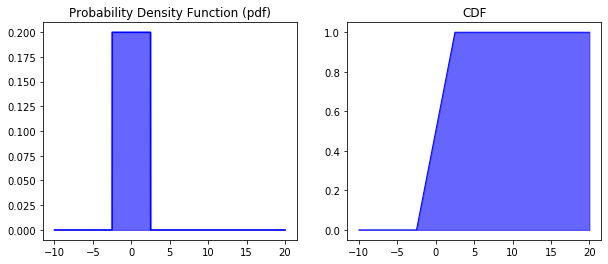

In [7]:
# Continuous version
def uniform(mu,W):
    x = np.linspace(-10, 20, 2000)
    m2 = mu-W/2.
    n = scipy.stats.uniform(m2, W)   # Define m2 because first argument is left edge
    plot_dist(x,n)
    plt.show()
    return

interact(uniform, mu=(-10.,10.), W=(0.001, 10.0));# comment if ipywidget is not installed / does not work
# uniform(2,4)   # Run this command if ipywidget does not work - modify params

### Binomial

A binomial distribution is basically the sum of outcomes of things that follow a Bernoulli distribution.

$$
B(k\,|\,n\,,p) = \binom{n}{k}p^k(1-p)^{n-k} = \frac{n!}{k!\,(n-k)!}\,p^k\,(1-p)^{(n-k)}
$$

**Parameters**: 

* $n$ : Number of trials
* $p$ : Probability of trial being successful

Expectation: $np$

Standard Deviation: $\sqrt{n\,p\,(1-p)}$

This is a *discrete* distribution for a *variable* $k$ (that takes only integer values). It is the distribution of *random variables that can take only two values* (i.e. success/failure; event happening/event not happening, ...). The distribution of the random variable $k$, $B(k|n,p)$, measures how many times success occured amoung $n$ trials.

**Example:** 
- Toss a fair coin n times: how many times do you get a head (success = 1) ? 
- Urn with equal number of white / black ball *with replacement* 
- Pick galaxies on the sky: Elliptical-type/ other type. You know the fraction of ellipticals (e.g. p=0.2). What is the chance, if you observe 10 galaxies at random to observe 0, 1, 2, ... galaxies ? The answer is given by the binomial distribution. 

**Note 1**: If $n=1$, we find back the *Bernouilli* distribution 

**Note 2**: A generalisation of the binomial distribution is the multinomial distribution, if the random variables take more than 2 values, let's say M values with associated probabilities $p_1, p_2, ..., p_M$ (with $\sum_i p_i = 1.$). This is called in python with `scipy.stats.multinomial(sample, [p1,p2,pn])`. See the example below: 
``` python 
# Let's consider 10 trials and 3 events A, B, C with p=(0.2, 0.5, 0.3) ; note that p_A + p_B + p_C = 1 
n=10
p=[0.2, 0.5, 0.3] # p_A = 0.2 ; p_B=0.5 ; p_C = 0.3 
d = scipy.stats.multinomial(n, p)  # Frozen multinomial distribution with n=10, p=[0.2, 0.5, 0.3]
# To calculate the probability of getting 3 times A, 4 times B, and 3 times C (A+B+C=10)
x = [3, 4, 3]
Pofx = d.pmf(x)  # only 1 argument if the distribution parameters have been defined previously: you work on a specific instance of the distribution
# If you which to plot the full PMF, you'll need to make a 3D histogram ... and generate an array of (10*10*10, 3) and for each row i you have x[i, 0]+x[i,1]+x[i,2]=10 
Out: 0.0567
``` 


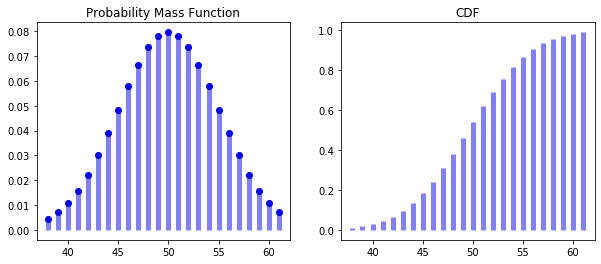

In [8]:
def binomial(sample, p_success):
    d = scipy.stats.binom(sample, p_success)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

interact(binomial, sample=(1,200,1), p_success=(0.01,1,0.01)); # comment if ipywidget is not installed / does not work
# binomial(10,0.2)   # Run this command if ipywidget does not work - modify params

### Hypergeometric

This is a cousin of the binomial distribution. It describes the probability of $k$ successes (random draws for which the object drawn has a specified feature) in $n$ draws, *without replacement*, from a finite population of size $N$ that contains exactly $K$ objects with that feature, wherein each draw is either a success or a failure. 


$$
Hyp(k |\,N,\,K,\,n) = \frac{\binom{K}{n} \binom{N-K}{n-k} }{\binom{N}{n}}
$$

**Parameters:**   

* $N$ : the population size,
* $K$ : the number of success states in the population,
* $n$ : the number of draws,

Expectation: $n \frac{K}{N}$

Standard Deviation: $\sqrt{n\,\frac{K}{N}\,\frac{N-K}{N}\,\frac{N-n}{N-1} }$

**Examples:**    
- Urn with equal number of white / black ball *without* replacement 
- Stars in a field: Imagine that you observe a given field of the sky with 200 stars. You know that 10 of them are O-type and your instrument allows you to obtain 100 spectra. What is the probability that 5 of them are of the desired type ? 0.25 ; This is a bit different from the binomial case where you would know that the probability for the given star type is 0.05, and would obtain 100 spectra. The difference is subtle and comes from the fact that you know that there are 10 stars among the 200 that are of a given type. This is different of saying that the probability to observe such a star is 0.05.  

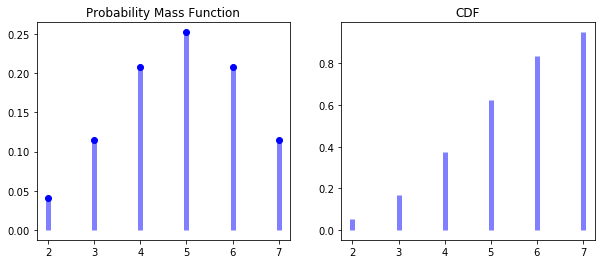

In [10]:
def hypergeom(sample, success, n_drawn):
    d = scipy.stats.hypergeom(sample, success, n_drawn)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

# Success, here is the number of times you got a success

#interact(hypergeom, sample=(0,200,1), success=(0, 199, 1), n_drawn=(1, 200, 1)); # comment if ipywidget is not installed / does not work
hypergeom(sample=200, success=10, n_drawn=100)   # Run this command if ipywidget does not work - modify params
# Try with
# Sample = 200 ; success = 10 (10/200 stars of desired type), n_drawn=100 ; 
# Compare with binomial using sample = 100,success = 200/10 = 0.05

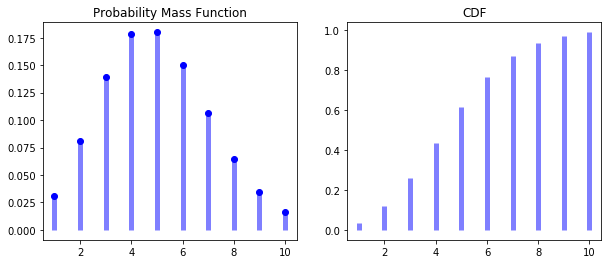

In [11]:
binomial(100,0.05)

## Poisson distribution

This is a special case of the binomial distribution, when the number $N$ of trials goes to infinity, but the fraction of success (rate of an event) remains small. 

$$
\rm{Pois}(k\,|\,\mu) = \frac{\mu^ke^{-\mu}}{k!}
$$

**Parameters:** $\mu$ - Anticipated number of (random) events

Expectation: $\mu$

Standard Deviation: $\sqrt{\mu}$
  
**Example**: This is an important distribution in astronomy because it describes the distribution of the number of photons counted in a given interval. X-ray photons (especially of faint X-ray sources !) strictly follow Poisson distribution. When there are many photons, the distribution becomes close to a gaussian $N(\mu, \sqrt{\mu})$. You can identify the trials to the photons sent (in all directions) but we collect only a few of them. In fact we can say that photons arrive at a rate $\lambda$ $=>$ If I integrate over a time $t$, I measure $\mu = \lambda * t$ photons. The standard deviation is thus $\sqrt{\mu} = \sqrt{\lambda * t}$. Hence, in a photon limited case you have you Signal to Noise: $ \frac{S}{N} = \frac{\mu}{\sqrt{\mu}} \propto \sqrt{t}$. If you want to double your Signal To Noise Ratio (S/N or SNR), you'll need to multiply your exposure time by 4. Instead, if you observe faint objects, you may be limited by the read out noise.

**Note:** Originally Poisson distribution was developed to study the chance of a Prussian cavalryman to be killed by the kick of a horse. A relatively rare event.   

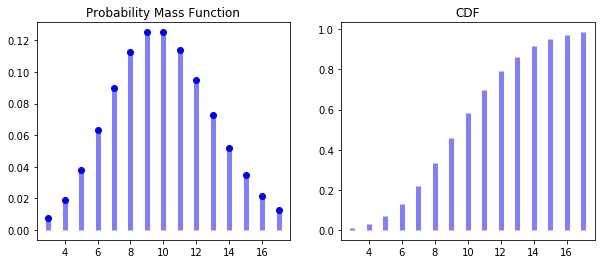

In [12]:
def poisson(m):
    d = scipy.stats.poisson(m)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

interact(poisson, m=(1,20,1));  # comment if ipywidget is not installed / does not work
# poisson(10)   # Run this command if ipywidget does not work - modify params

## Geometric distribution

The probability distribution of the number $k$ of Bernoulli trials needed to get one success. 

$$
Geom(k\,|\,p) = (1-p)^{(k-1)}\,p   ~~~~~~~ {\rm{for\,}} k\,{\rm{in}}\, \{1, 2, 3, ...\}
$$

**Parameters:** $p$, the probability of a single success

Expectation: $\frac{1}{p}$

Standard Deviation: $\sqrt{\frac{1-p}{p^2}}$

**Example:** 
- How many times should I try flipping a coin before getting a success ? 
- Knowing the probability to observe a transit of a given depth, what is the probability to get a transit after observing only 2 stars ? To answer this question, you'll use the geometric distribution.  

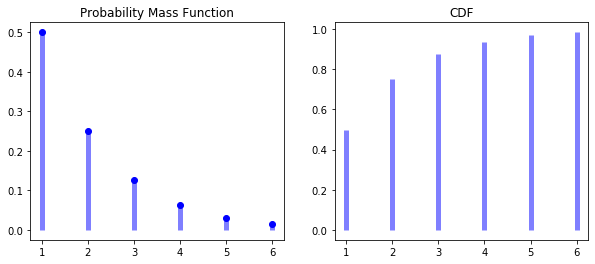

In [13]:
def geometric(p):
    d = scipy.stats.geom(p)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    plt.show()
    return

interact(geometric, p=(0.,1.,0.05));   # comment if ipywidget is not installed / does not work
# geometric(0.35)   # Run this command if ipywidget does not work - modify params


## Gaussian or normal distribution

$$
N(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

**Parameters:** 

* $\mu$ : central peak location
* $\sigma$: peak width

Expectation: $\mu$

Standard Deviation: $\sigma$

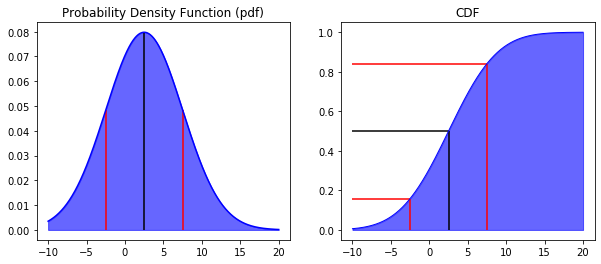

In [14]:
def normal(mu,sigma):
    x = np.linspace(-10, 20, 2000)
    n = scipy.stats.norm(mu, sigma)
    plot_dist(x,n, distname='gauss')
    plt.show()
    return

interact(normal, mu=(-5.,10.), sigma=(0.001, 10.0)); # comment if ipywidget is not installed / does not work
# normal(mu=0, sigma=5)   # Run this command if ipywidget does not work - modify params


### Change of variable for a normal distribution

Instead of considering a normal distribution of mean $\mu$ and width $\sigma$, one generally make a change of variable to end up to a "canonical" gaussian pdf centered in 0, and of width $\sigma=1$, i.e. $N(0,1)$. 
If we write $y = (x-\mu)/\sigma$, then we have:

$$
N(0,1) \, = \frac{1}{\sqrt{2\pi}} \, \exp(-0.5\,y^2)
$$


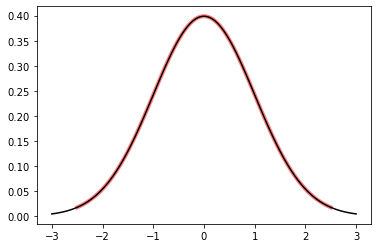

In [17]:
# Illustration: distribution of (x-\mu)/sigma
x = np.linspace(0., 10., 100)
mu, sigma = 5., 2. 
y = (x - mu) / sigma
Nman = 1. / np.sqrt( 2. * np.pi ) * np.exp( -0.5 * y**2 )
plt.figure()
plt.plot(y, Nman, alpha=0.5, lw=4, color='red')

x2 = np.linspace(-3.,3.,100)
n_scipy = scipy.stats.norm()
plt.plot(x2, n_scipy.pdf(x2), color='black')
plt.show()

## Chi square ($\chi^2$) distribution   <a class="anchor" id="chi2"></a>

If {x_i} are drawn from a gaussian distribution $N(\mu, \sigma)$, and if we define $z_i = (x - \mu)/\sigma$, and
$Q = \sum_{i=1}^{k} z_i^2$, the $\chi^2$ distribution, with $k$ degrees of freedom is:      

$$
p(Q|k) \equiv \chi^2(Q \, |\, k) =  \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

i.e. this is the distribution followed by the sum of the square of k independent, normally distributed, random variable. 

**Parameters:** $k$  (dof)

Expectation: $k$ 

Standard deviation: $\sqrt{2\,k}$ 

Note that $\Gamma(k) \, \equiv \, (k-1)!$ ($k>0$). 

It is convenient to define $\chi^2_{{\rm dof}} \, \equiv \, \chi^2(Q/k \, |\, k)$ which has a mean of 1, and a standard deviation $\sqrt{2 / k}$. 

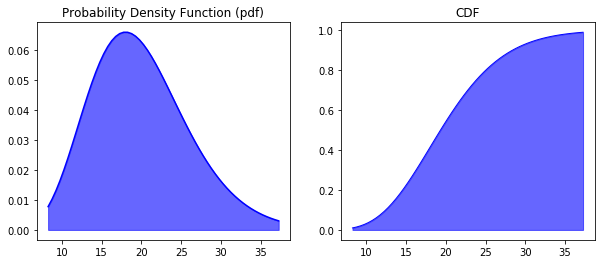

In [18]:
def chi2(k):
    d = scipy.stats.chi2(k)
    x = np.arange(d.ppf(0.01), d.ppf(0.99), 0.5)
    plot_dist(x, d, continuous=True)
    plt.show()
    return

interact(chi2, k=(1,40,1));

## Student's distribution

$$
p(x \, | \, k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi\,k} \, \Gamma(k/2)} \, \left( 1 + \frac{x^2}{k} \right)^{-\frac{k+1}{2} },
$$

**Parameters:** $k$ $\equiv$ number of degrees of freedom (sometimes also writen $\nu$). 

Expectation: 0 (if $k > 1$, undefined if $k=1$)

Standard deviation: $\sqrt{k/(k-2)}$ if $k > 2$


If we take a sample on N measurement $\{x_i\}$ drawn from from a gaussian $N(\mu, \sigma)$, the random variable:

$$
t = \frac{\bar{x} \,-\, \mu }{\hat{\sigma}/\sqrt{N}}
$$

follows a Student's $t(k)$ distribution with $k = N-1$ dof. 

Note in the above formula, $\bar{x}$ is an estimator of the mean $\mu$ and $\hat{\sigma} = \frac{1}{\sqrt{N-1}} \sqrt{\sum_i(x_i-\bar{x})^2}$, i.e. $\hat{\sigma}$ is the *estimator* of the standard deviation. 

Don't be confused ! The random variable:
$$
y = \frac{\bar{x} \,-\, \mu }{\sigma/\sqrt{N}},
$$
where $\sigma$ is the "true" (population) std dev of the distribution, follows a normal distribution $N(0, 1)$, not a Student's distribution. 

**Example**: The student's distribution is useful when calculating confidence interval or ratios of random variables drawn from normal distributions. 

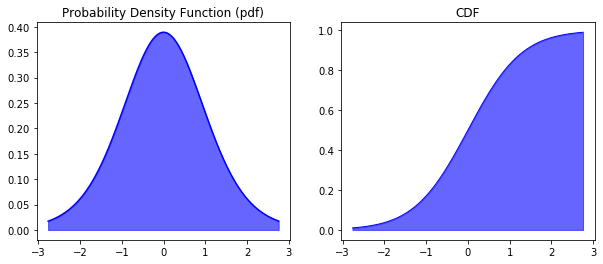

In [19]:
def student(k):
    d = scipy.stats.t(k)
    x = np.arange(d.ppf(0.01), d.ppf(0.99), 0.01)
    plot_dist(x, d, continuous=True)
    plt.show()
    return

interact(student, k=(0,20,0.5) );

# X. References and supplementary material:

Chapter 3 (3.2) of the book *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy.

Relationships between probability density distributions: http://www.math.wm.edu/~leemis/chart/UDR/UDR.html 

Common PDFS: the crib sheet https://medium.com/@srowen/common-probability-distributions-347e6b945ce4

*All of statistics: a concise course in statistical inference*, Wasserman 2004 (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).

Numerical recipes by Press et al. Cambridge University press: Chapter 14